In [1]:
import os
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pydot


In [2]:

with zipfile.ZipFile( '/Users/clara_bourdon/Downloads/trafficsigns_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [3]:
root_dir = './trafficsigns_dataset'

# Liste pour stocker les noms des images, sous-dossiers et dossiers principaux
image_names = []
subfolder_names = []
folder_names = []
image_path = []

for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            image_names.append(file)
            subfolder_names.append(os.path.basename(root))
            folder_names.append(os.path.basename(os.path.dirname(root)))
            image_path.append('./trafficsigns_dataset/' + str(os.path.basename(os.path.dirname(root)) + '/' + str(os.path.basename(root)) + '/'  + str(file)))


data= pd.DataFrame({
    'Image_name': image_names,
    'Subfolder_Name': subfolder_names,
    'Folder_Name': folder_names,
    'Image_path' : image_path
})
data.head()

,Image_name,Subfolder_Name,Folder_Name,Image_path
0,00039_00001.png,rightofway,diamond,./trafficsigns_dataset/diamond/rightofway/0003...
1,01803_00002.png,rightofway,diamond,./trafficsigns_dataset/diamond/rightofway/0180...
2,01702_00000.png,rightofway,diamond,./trafficsigns_dataset/diamond/rightofway/0170...
3,00111_00001.png,rightofway,diamond,./trafficsigns_dataset/diamond/rightofway/0011...
4,01231_00003.png,rightofway,diamond,./trafficsigns_dataset/diamond/rightofway/0123...


In [4]:
data.shape

(3699, 4)

In [5]:
value_counts_a = data['Subfolder_Name'].value_counts()

value_counts_b = data['Folder_Name'].value_counts()

print(value_counts_a)

print(value_counts_b)

Subfolder_Name
warning             695
noentry             375
speed               316
bicycle             285
rightofway          282
parking             276
noparking           242
giveway             231
continue            199
trafficdirective    195
limitedtraffic      125
traveldirection     124
laneend             118
roundabout           98
crossing             95
stop                 43
Name: count, dtype: int64
Folder_Name
round       1760
triangle     926
square       688
diamond      282
hex           43
Name: count, dtype: int64


In [6]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 2219, Val Data: 740, Test Data: 740


ILS DISENT DE FAIRE UNE EDA ICI !!!!!!!!!!!!!!!!!!!!!!!!!

In [7]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')
    plt.gca().title.set_color('white')
    plt.gca().xaxis.label.set_color('white')
    plt.gca().yaxis.label.set_color('white')
    plt.gca().tick_params(axis='x', colors='white')
    plt.gca().tick_params(axis='y', colors='white')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.gca().title.set_color('white')
    plt.gca().xaxis.label.set_color('white')
    plt.gca().yaxis.label.set_color('white')
    plt.gca().tick_params(axis='x', colors='white')
    plt.gca().tick_params(axis='y', colors='white')

    plt.show()

In [8]:
INPUT_DIM = (32,32,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 5

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.16.1'

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 787,973 (3.01 MB)

 Trainable params: 787,973 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hasattr(pydot, 'InvocationException')


False

In [13]:
#tf.keras.utils.plot_model(model, show_shapes=True)

In [14]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [15]:
train_data['Folder_Name'] = train_data['Folder_Name'].astype('str')
val_data['Folder_Name'] = val_data['Folder_Name'].astype('str')
train_data.head()

,Image_name,Subfolder_Name,Folder_Name,Image_path
3009,01483_00001.png,noparking,round,./trafficsigns_dataset/round/noparking/01483_0...
2409,00937_00000.png,speed,round,./trafficsigns_dataset/round/speed/00937_00000...
966,00791_00002.png,crossing,square,./trafficsigns_dataset/square/crossing/00791_0...
1307,01081_00001.png,warning,triangle,./trafficsigns_dataset/triangle/warning/01081_...
1798,00567_00002.png,warning,triangle,./trafficsigns_dataset/triangle/warning/00567_...


In [16]:

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="Image_path",
        y_col="Folder_Name",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="Image_path",
        y_col="Folder_Name",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


In [17]:
#history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)
history = model.fit(train_generator, validation_data=validation_generator, epochs=50, verbose=0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


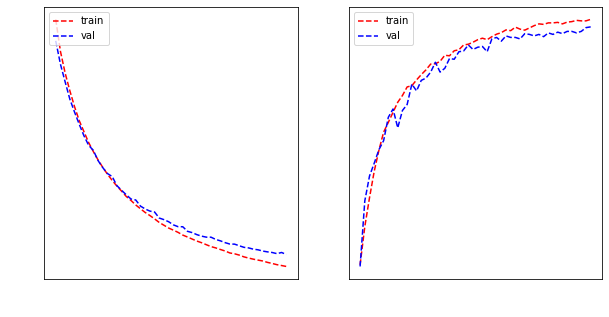

In [18]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

# testing 

In [19]:
test_data['Folder_Name'] = test_data['Folder_Name'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="Image_path",
        y_col="Folder_Name",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 5 classes.


In [20]:
model.evaluate(test_generator)

244/740 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - categorical_accuracy: 0.9234 - loss: 0.3008

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - categorical_accuracy: 0.9253 - loss: 0.3014


[0.2917526364326477, 0.9283784031867981]

# on plot des resultats

In [21]:
label_names = {'diamond' : 0, 'hex' : 1, 'round' : 2, 'square' : 3, 'triangle' : 4}

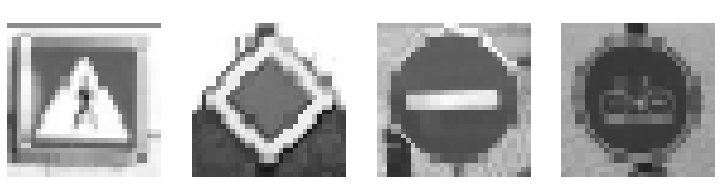

In [22]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ), color='white')

            
        else:
            break
        
        plt.axis('off')